<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/Image_Face_Detection_Haarcascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drive mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# git에서 dataset 다운로드
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 311972, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 311972 (delta 1), reused 32 (delta 1), pack-reused 311929
Receiving objects: 100% (311972/311972), 499.19 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (217214/217214), done.
Checking out files: 100% (7017/7017), done.


In [3]:
# haarcascasdes의 xml파일 drive로 복사
!cp -r /content/opencv/data/haarcascades /content/gdrive/MyDrive/CV/Face\ Detection/data
print('folder copy complete!!')

folder copy complete!!


In [4]:
# 다운받은 파일 삭제
!rm -r opencv

In [5]:
# 모듈 임포트
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [6]:
print('OpenCV version:')
print(cv2.__version__)

OpenCV version:
4.6.0


width: 743 pixels
height: 496 pixels
channels: 3
# # # # Original Image # # # #


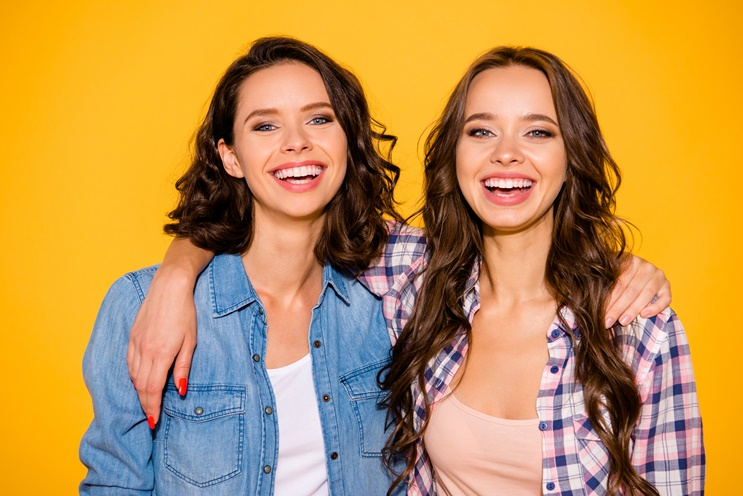

In [7]:
# 원본 이미지 Display
img = cv2.imread('/content/gdrive/MyDrive/CV/Face Detection/data/image/face_07.jpg')
print('width: {} pixels'.format(img.shape[1]))
print('height: {} pixels'.format(img.shape[0]))
print('channels: {}'.format(img.shape[2]))

(height, width) = img.shape[:2]
print('# # # # Original Image # # # #')
cv2_imshow(img)

In [8]:
# haarcascade module 위치 정의

# 얼굴을 인식하는 feature
face_cascade_name = '/content/gdrive/MyDrive/CV/Face Detection/data/haarcascades/haarcascade_frontalface_alt.xml'

# 눈을 인식하는 feature
eyes_cascade_name = '/content/gdrive/MyDrive/CV/Face Detection/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml'

In [9]:
# face_cascade 인스턴트 생성
face_cascade = cv2.CascadeClassifier()

In [10]:
# eyes_cascade 인스턴트 생성
eyes_cascade = cv2.CascadeClassifier()

In [11]:
# cascade 파일 로드
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('- -(!)Error loading face cascade')
    exit(0)

if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('- -(!)Error loading eyes cascade')
    exit(0)

In [12]:
# width size 지정
frame_width = 700

In [19]:
# Face Detection & Display 함수 정의
def detectAndDisplay(frame):
    # frame_width 에 맞춰 image resize
    (height, width) = frame.shape[:2]
    ratio = frame_width / width
    dimension = (frame_width, int(height * ratio))
    frame = cv2.resize(frame, dimension, interpolation = cv2.INTER_AREA)

    # 채널이 많으면 인식율이 떨어짐으로 하나의 채널(GRAY)로 변환
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    
    # faces detection 한다.
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x, y, w, h) in faces:
        center = (x + w//2, y + h //2)
        # detection 된 얼굴에 사각형을 그리기
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)
        # frame_gray에서 방금 그린 얼굴 사각형 영역만 가져오기(faceROI)
        faceROI = frame_gray[y:y+h, x:x+w]
        # faceROI에서 eyes을 detection
        eyes = eyes_cascade.detectMultiScale(faceROI)

        for(x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2) * 0.25)) # 반지름 계산
            # detection 된 눈에 원을 그리기
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)

    print('# # # # Face detection(haarcascade) # # # #')
    
    # 이미지 diplay
    cv2_imshow(frame)

# # # # Face detection(haarcascade) # # # #


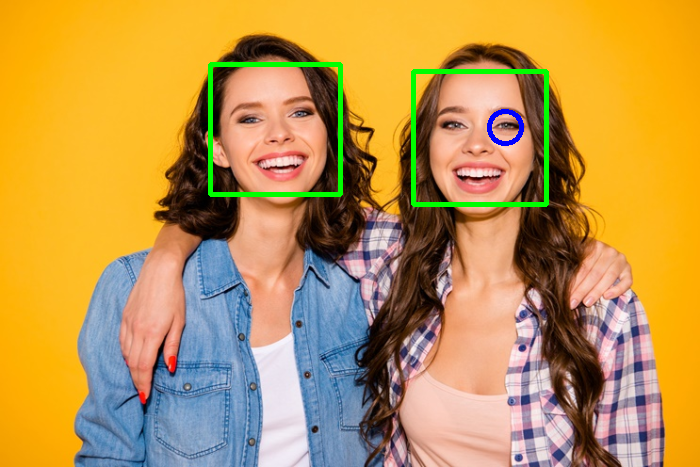

In [20]:
# detectAndDisplay() 함수 호출
detectAndDisplay(img)

### haarcascade module face detection
- detection 속도는 빠르지만 정확도가 떨어짐
- 얼굴이 정면이 아닌 돌려져 있으면 인식률 떨어짐
- 이미지의 크기(해상도)가 작아지면 인식률 떨어짐
- 서양인에 비해 동양인 인식률이 떨어짐